In [109]:
# Standard Imports for Data Analysis and Visualizations
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Filter and Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Read Datasets
df = pd.read_csv("bank-full.csv", sep = ";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [111]:
# Shape of Dataframe
print(df.shape)

(45211, 17)


In [112]:
# Data Types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [113]:
# Number of unique values in each column for the features data
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["# of Unique Values:"]).transpose()

,# of Unique Values:
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [114]:
# Summary Statistics for continuous features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [115]:
# Exploring target variable - y
df['y'].describe().transpose()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

In [116]:
# Counts of classes in target variable - y
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

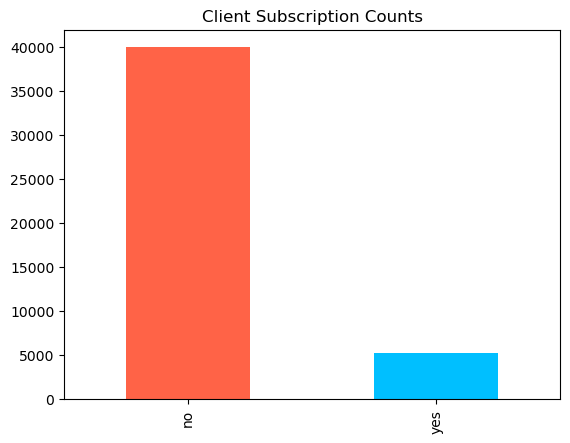

In [117]:
# Bar Plot of target variable - y
df.y.value_counts().plot(kind = "bar", color = ["tomato", "deepskyblue"], title = "Client Subscription Counts");

In [118]:
# Number of missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are **no (0) missig values** in this dataset!

In [119]:
# Number of duplicates
duplicates_number = df.duplicated().sum()
print("Number of duplicated rows is: ", duplicates_number)

Number of duplicated rows is:  0


There are **no (0) duplicate rows** in this dataset!

## Exploring and Handling Outliers in Numerical Features

We will be exploring the outliers in our numerical features and deciding if they should be removed based on the context of the feature as well if there are lot of outliers present for a given feature. 

### 1. `age`

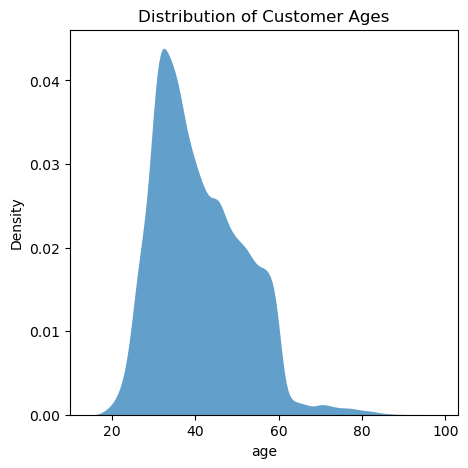

In [120]:
# Density Plot of age feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'age', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Customer Ages");

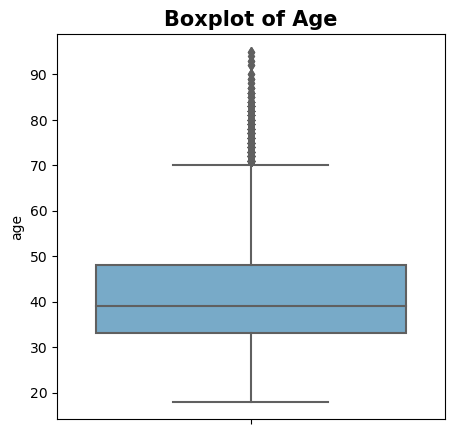

In [121]:
# Boxplot of age feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['age'], palette = 'Blues')
ax.set_title('Boxplot of Age', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [122]:
# Using IQR to inspect outliers
age_stats = df['age'].describe()
IQR = age_stats['75%'] - age_stats['25%']
upper_bound = age_stats['75%'] + 1.5 * IQR
lower_bound = age_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the age feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the age feature are:  (70.5, 10.5)


In [123]:
# Examine the outliers below the lower bound of age feature
df[df['age'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [124]:
# Examine the outliers above the upper bound of age feature
df[df['age'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


The `age` feature has outliers in the upper bound because of the eldery population who are a legitmate representation of the population of the customer. Removing them does not make sense. 

### 2. `balance`

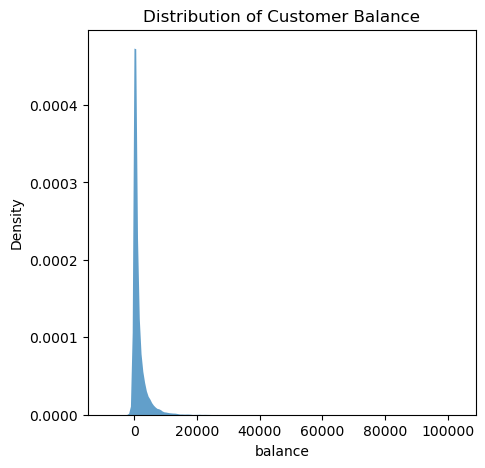

In [125]:
# Density Plot of balance feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'balance', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Customer Balance");

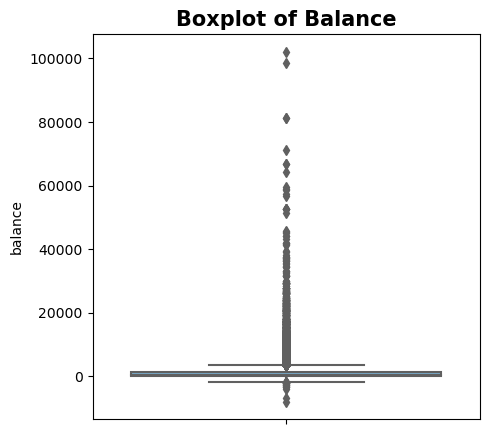

In [126]:
# Boxplot of balance feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['balance'], palette = 'Blues')
ax.set_title('Boxplot of Balance', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [127]:
# Using IQR to inspect outliers
balance_stats = df['balance'].describe()
IQR = balance_stats['75%'] - balance_stats['25%']
upper_bound = balance_stats['75%'] + 1.5 * IQR
lower_bound = balance_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the balance feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the balance feature are:  (3462.0, -1962.0)


In [128]:
# Examine the outliers below the lower bound of balance feature
df[df['balance'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
7756,49,management,divorced,tertiary,no,-2049,yes,no,unknown,30,may,169,3,-1,0,unknown,no
11655,56,management,divorced,tertiary,yes,-1968,no,no,unknown,20,jun,60,3,-1,0,unknown,no
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
13687,38,blue-collar,divorced,secondary,no,-2093,yes,yes,unknown,9,jul,120,3,-1,0,unknown,no
13708,49,entrepreneur,married,secondary,no,-1965,no,yes,telephone,10,jul,317,2,-1,0,unknown,no
14434,51,management,divorced,tertiary,no,-2282,yes,yes,cellular,14,jul,301,6,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
17159,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no


In [129]:
# Examine the outliers above the upper bound of balance feature
df[df['balance'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


We will remove the outliers in the lower and upper bound of the `balance` feature. 

In [130]:
# Drop Outliers
df.drop(df[df['balance'] > upper_bound].index, inplace = True)
df.drop(df[df['balance'] < lower_bound].index, inplace = True)
print(df.shape)

(40482, 17)


### 3. `day`

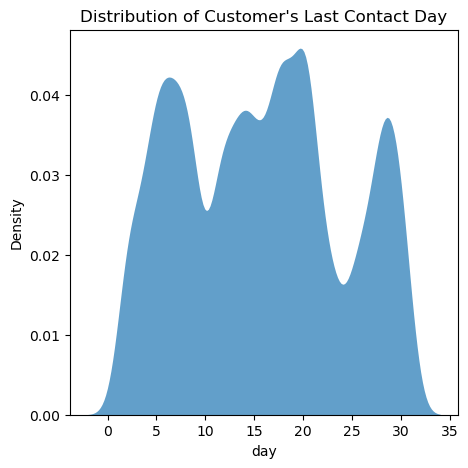

In [131]:
# Density Plot of day feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'day', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Customer's Last Contact Day");

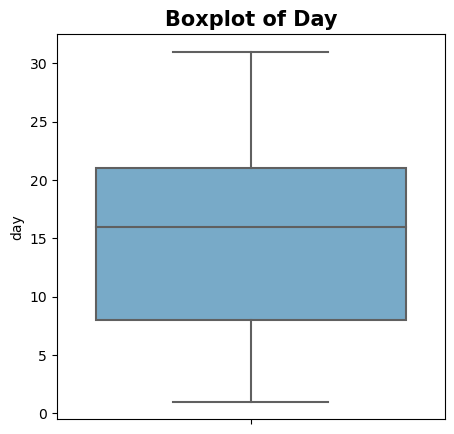

In [132]:
# Boxplot of day feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['day'], palette = 'Blues')
ax.set_title('Boxplot of Day', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [133]:
# Using IQR to inspect outliers
day_stats = df['day'].describe()
IQR = day_stats['75%'] - day_stats['25%']
upper_bound = day_stats['75%'] + 1.5 * IQR
lower_bound = day_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the day feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the day feature are:  (40.5, -11.5)


In [134]:
# Examine the outliers below the lower bound of day feature
df[df['day'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [135]:
# Examine the outliers above the upper bound of day feature
df[df['day'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


There are no outliers present in the `day` feature.

### 4. `duration`

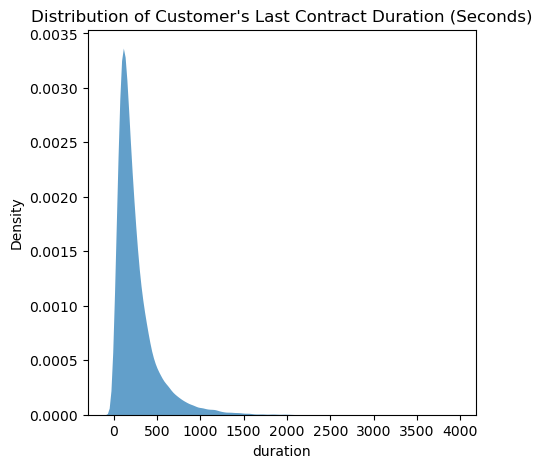

In [136]:
# Density Plot of duration feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'duration', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Customer's Last Contract Duration (Seconds)");

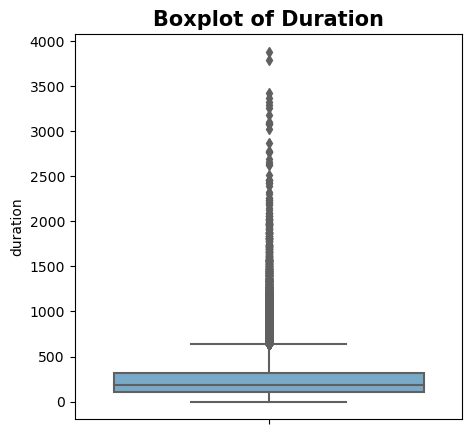

In [137]:
# Boxplot of duration feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['duration'], palette = 'Blues')
ax.set_title('Boxplot of Duration', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [138]:
# Using IQR to inspect outliers
duration_stats = df['duration'].describe()
IQR = duration_stats['75%'] - duration_stats['25%']
upper_bound = duration_stats['75%'] + 1.5 * IQR
lower_bound = duration_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the duration feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the duration feature are:  (635.5, -216.5)


In [139]:
# Examine the outliers below the lower bound of duration feature
df[df['duration'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [140]:
# Examine the outliers above the upper bound of duration feature
df[df['duration'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45085,25,technician,single,secondary,no,325,no,no,cellular,22,oct,716,3,-1,0,unknown,yes
45124,27,blue-collar,single,primary,no,232,yes,no,cellular,26,oct,701,2,-1,0,unknown,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


We will remove the outliers in the lower and upper bound of the `duration` feature. 

In [141]:
# Drop Outliers
df.drop(df[df['duration'] > upper_bound].index, inplace = True)
df.drop(df[df['duration'] < lower_bound].index, inplace = True)
print(df.shape)

(37572, 17)


### 5. `campaign`

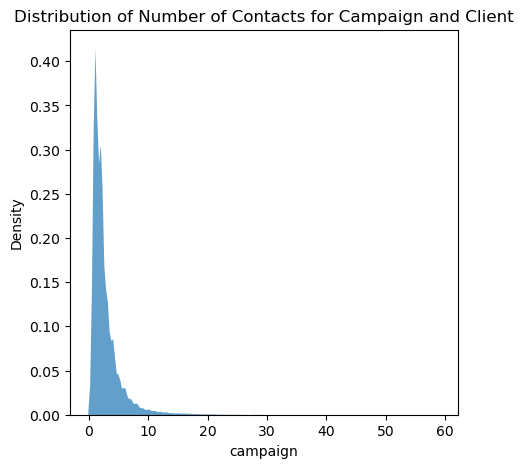

In [143]:
# Density Plot of campaign feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'campaign', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Number of Contacts for Campaign and Client");

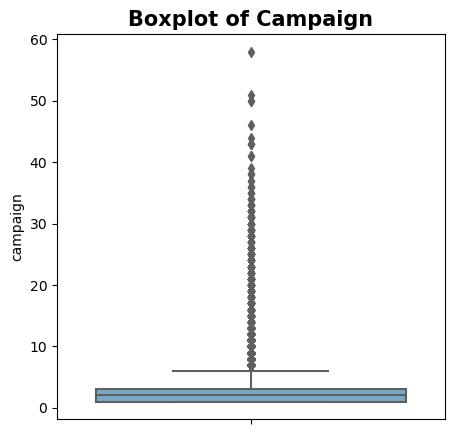

In [144]:
# Boxplot of campaign feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['campaign'], palette = 'Blues')
ax.set_title('Boxplot of Campaign', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [145]:
# Using IQR to inspect outliers
campaign_stats = df['campaign'].describe()
IQR = campaign_stats['75%'] - campaign_stats['25%']
upper_bound = campaign_stats['75%'] + 1.5 * IQR
lower_bound = campaign_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the campaign feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the campaign feature are:  (6.0, -2.0)


In [146]:
# Examine the outliers below the lower bound of campaign feature
df[df['campaign'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [147]:
# Examine the outliers above the upper bound of campaign feature
df[df['campaign'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,no
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,-1,0,unknown,no
1105,43,admin.,married,tertiary,no,1924,yes,no,unknown,7,may,244,7,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44594,34,technician,single,tertiary,no,2481,no,no,cellular,23,aug,220,16,192,14,other,no
44666,25,technician,single,secondary,no,1298,no,no,cellular,2,sep,206,7,94,2,other,no
44680,27,self-employed,single,tertiary,no,560,no,no,telephone,3,sep,543,9,465,2,failure,no
44770,37,services,single,tertiary,no,1189,no,no,cellular,13,sep,323,9,199,4,other,yes


We will remove the outliers in the upper bound of the `campaign` feature. 

In [148]:
# Drop Outliers
df.drop(df[df['campaign'] > upper_bound].index, inplace = True)
print(df.shape)

(34967, 17)


### 6. `pdays`

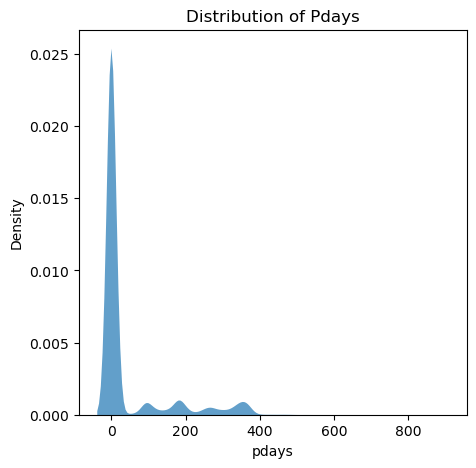

In [149]:
# Density Plot of pdays feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'pdays', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Pdays");

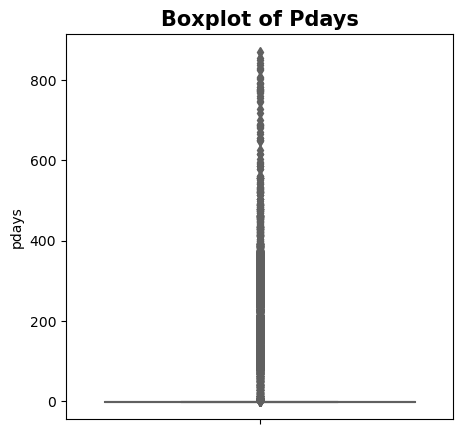

In [150]:
# Boxplot of pdays feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['pdays'], palette = 'Blues')
ax.set_title('Boxplot of Pdays', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [151]:
# Using IQR to inspect outliers
pdays_stats = df['pdays'].describe()
IQR = pdays_stats['75%'] - pdays_stats['25%']
upper_bound = pdays_stats['75%'] + 1.5 * IQR
lower_bound = pdays_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the pdays feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the pdays feature are:  (-1.0, -1.0)


In [152]:
# Examine the outliers below the lower bound of pdays feature
df[df['pdays'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [153]:
# Examine the outliers above the upper bound of pdays feature
df[df['pdays'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


The outliers in the `pday` feature will not be removed. There are a lot of clients that haven't been contacted for a while, but it does not make sense to remove them becuase it is important to understand their inactvity. They definitely play a significant role in the context of the data as they represent a chunk of the client population. 

### 7. `previous`

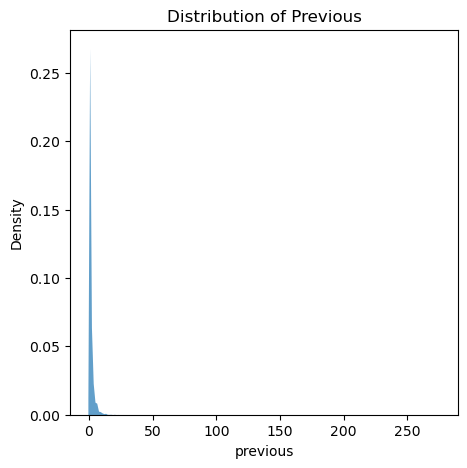

In [154]:
# Density Plot of previous feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.kdeplot(data = df, x = 'previous', fill = True, alpha = 0.7, linewidth = 0)
ax.set_title("Distribution of Previous");

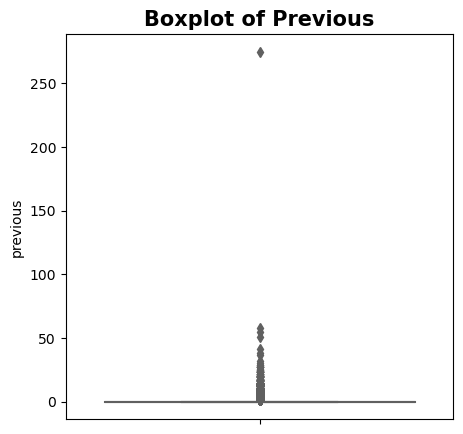

In [155]:
# Boxplot of previous feature
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['previous'], palette = 'Blues')
ax.set_title('Boxplot of Previous', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});

In [156]:
# Using IQR to inspect outliers
previous_stats = df['previous'].describe()
IQR = previous_stats['75%'] - previous_stats['25%']
upper_bound = previous_stats['75%'] + 1.5 * IQR
lower_bound = previous_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the previous feature are: ", (upper_bound, lower_bound))

The upper and lower bounds for the previous feature are:  (0.0, 0.0)


In [157]:
# Examine the outliers below the lower bound of pdays feature
df[df['previous'] < lower_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [158]:
# Examine the outliers above the upper bound of pdays feature
df[df['previous'] > upper_bound]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


Based on our boxplot, there is one apparent outlier that crosses 250 in the `previous` feature. This appears to be a very loyal customer that has conducted a lot of campaigns prior with the company. However, this client is clearly an outlier. The other customers that lie above the upper bound will not be dropped because they make sense as there are going to be a lot of returning customers who have been signing contracts with the company in the past. 

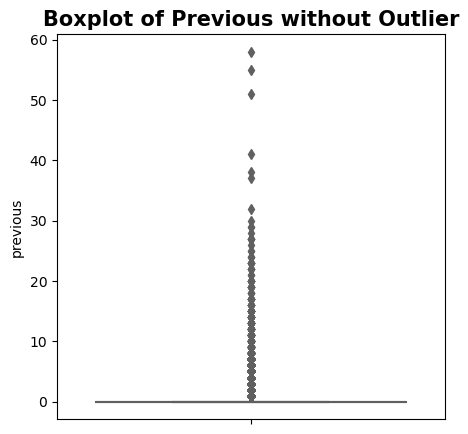

In [159]:
# Remove outlier customer with over 250 contracts
df = df[df.previous <= 250]

# Boxplot of previous feature with removed outlier
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(y = df['previous'], palette = 'Blues')
ax.set_title('Boxplot of Previous without Outlier', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'});